In [1]:
library(shiny)
library(igraph)
library(tidyverse)
library(patchwork)
library(RColorBrewer)
library(Seurat)
library(SeuratWrappers)
library(anndata)
library(monocle3)
options(shiny.host="0.0.0.0",shiny.port=34000)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.4     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::groups()        masks igraph::groups()
✖ dplyr::lag()           m

In [6]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/atlas/libblas.so.3.10.3
LAPACK: /usr/lib/x86_64-linux-gnu/atlas/liblapack.so.3.10.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] monocle3_1.0.1              SingleCellExperiment_1.12.0
 [3] SummarizedExperiment_1.20.0 GenomicRanges_1.42.0       
 [5] GenomeInfoDb_1.26.7         IRanges_2.24.1             
 [7] S4Vectors_0.28.1            MatrixGenerics_1.2.1      

# Download Files

In [5]:
cmd_str='
set -e 
if ! [ -d "./downloads/epithelial_lineage_analysis/" ]; then 
    rm -rf "./downloads"
    mkdir -p "./downloads"
    cd "./downloads"
    wget -c "https://crc-atlas.s3.amazonaws.com/data.tar.gz"; 
    tar -xzvf "data.tar.gz"
fi
'
system(cmd_str,intern=TRUE)

character(0)

# The Epithelial Component

In [12]:
cds_epi_save_fp="./downloads/epithelial_lineage_analysis/cds_epi.rds"
cds_epi=readRDS(cds_epi_save_fp)

Plot the structure of the epithelial component

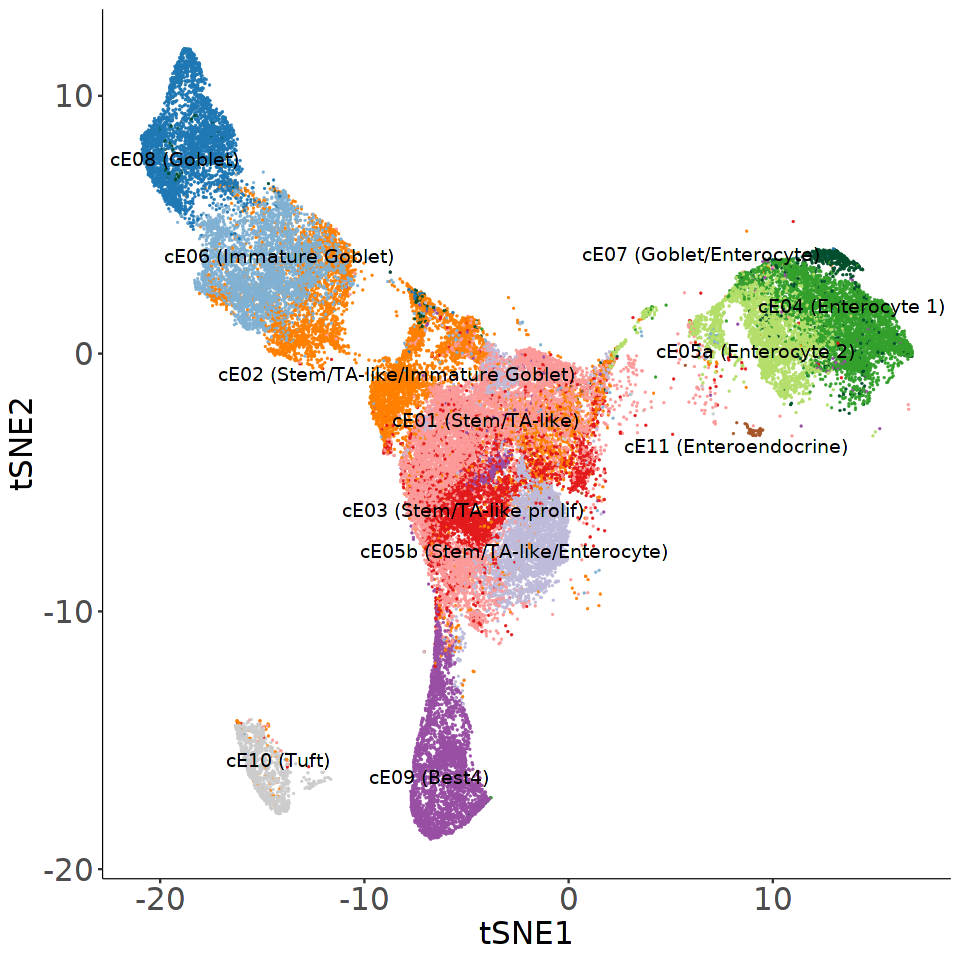

In [13]:
options(repr.plot.width=8, repr.plot.height=8)
celltype_cmap2=c('#F8766D','#DE8C00','#B79F00','#7CAE00','#00BA38','#00C08B','#00BFC4','#00B4F0','#619CFF','#C77CFF','#F564E3','#FF64B0')
all_colors=c(
    "#e31a1c","#fb9a99","#4daf4a","#984ea3","#ff7f00",
    "#ffff33","#a65628","#f781bf","#8dd3c7","#ffffb3",
    "#bebada","#fb8072","#80b1d3","#fdb462","#b3de69",
    "#fccde5","#a6cee3","#1f78b4","#b2df8a","#33a02c",
    "#333333","#808080","cccccc"
)
celltype_cmap=c(
    '#fb9a99','#ff7f00','#e31a1c',
    '#33a02c','#b3de69','#b3de69','#bebada',
    '#80b1d3','#034E2D','#1f78b4',
    '#984ea3','#cccccc','#a65628'
)

names(celltype_cmap)=c(
    'cE01 (Stem/TA-like)','cE02 (Stem/TA-like/Immature Goblet)','cE03 (Stem/TA-like prolif)',
    'cE04 (Enterocyte 1)','cE05 (Enterocyte 2)','cE05a (Enterocyte 2)','cE05b (Stem/TA-like/Enterocyte)',
    'cE06 (Immature Goblet)','cE07 (Goblet/Enterocyte)','cE08 (Goblet)',
    'cE09 (Best4)','cE10 (Tuft)','cE11 (Enteroendocrine)'
    
)
p=plot_cells(
    cds_epi, 
    label_groups_by_cluster=FALSE,  
    color_cells_by = "ClusterFullUnified",
    group_label_size=4,
    show_trajectory_graph = FALSE,
    trajectory_graph_color = '#999999',
    label_branch_points = FALSE,
    label_leaves = FALSE,
    label_roots = FALSE
) + labs(x="tSNE1",y="tSNE2") +
theme(
    axis.title.x = element_text(size = 18),
    axis.title.y = element_text(size = 18),
    axis.text.x = element_text(size = 18),
    axis.text.y = element_text(size = 18)
) + scale_color_manual(
    values=celltype_cmap
)
print(p)

# The Epithelial Markers

Verify the markers of each epithelial component

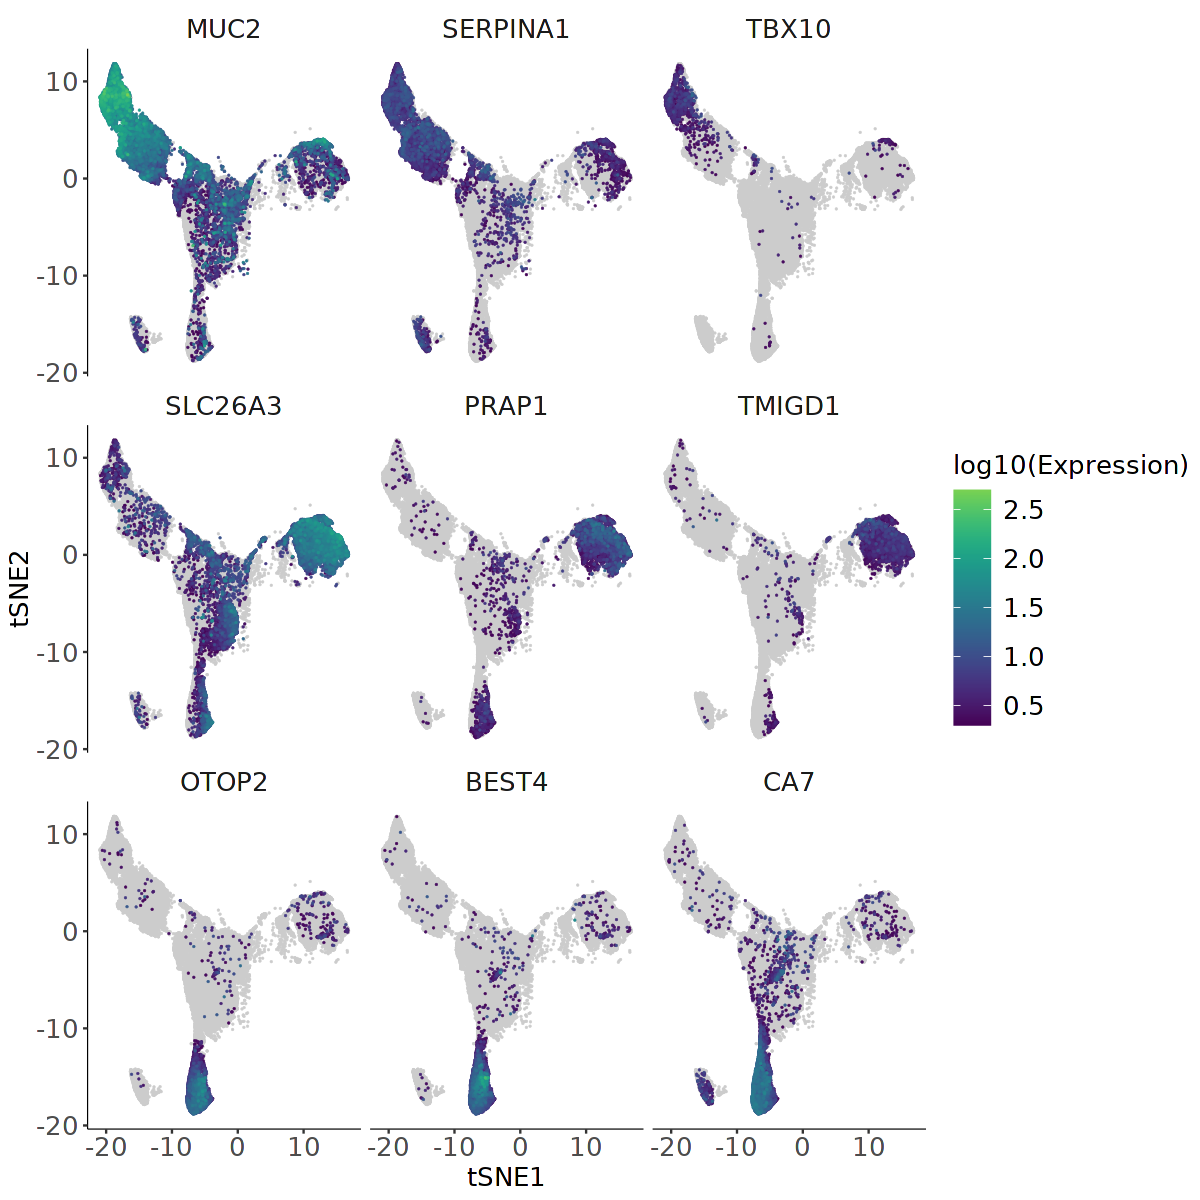

In [16]:
options(repr.plot.width=10,repr.plot.height=10)
p = plot_cells(cds_epi,
           genes = c("MUC2","SERPINA1","TBX10","SLC26A3","PRAP1","TMIGD1","OTOP2","BEST4","CA7"),
           show_trajectory_graph = FALSE,
           label_cell_groups=F,
           label_groups_by_cluster=F,
           label_leaves=F,
           label_branch_points=F,
           label_principal_points=F,
           label_root=F,
           graph_label_size=5,
           norm_method="log",
           min_expr=1
) + 
labs(x="tSNE1",y="tSNE2") +
theme(
    strip.text = element_text(size = 15),
    axis.title.x = element_text(size = 15),
    axis.title.y = element_text(size = 15),
    axis.text.x = element_text(size = 15),
    axis.text.y = element_text(size = 15),
    legend.text = element_text(size = 15),
    legend.title =  element_text(size = 15),
    legend.key.height = unit(1, 'cm'),
    legend.key.width = unit(0.8, 'cm'),
)
print(p)

# The Epithelial Pseudotime Plot

Load the data for each differentiation lineage separately

In [24]:
prefix="goblet_branch"
save_dir="./downloads/epithelial_lineage_analysis"
cds_epi.sub.goblet_branch=readRDS(file.path(save_dir,prefix,"subcds.rds"))

In [25]:
prefix="best4_branch"
cds_epi.sub.best4_branch=readRDS(file.path(save_dir,prefix,"subcds.rds"))

In [26]:
prefix="enterocyte_branch"
cds_epi.sub.enterocyte_branch=readRDS(file.path(save_dir,prefix,"subcds.rds"))

Plot the differentiation markers along pseudotime

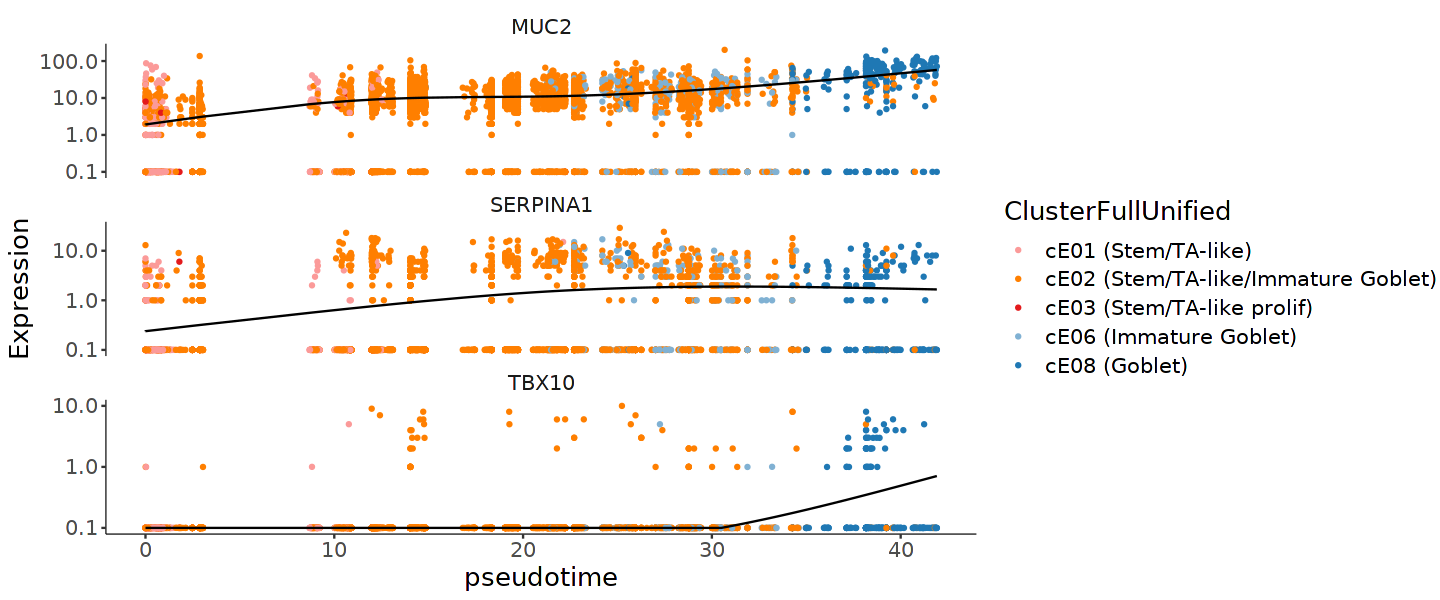

In [27]:
options(repr.plot.width=12,repr.plot.height=5)
genes <- c("MUC2","SERPINA1","TBX10")
lineage_cds = cds_epi.sub.goblet_branch
condition1=colData(lineage_cds)$sample_source=='in-house'
condition2=colData(lineage_cds)$ClusterFullUnified %in% c('cE01 (Stem/TA-like)','cE02 (Stem/TA-like/Immature Goblet)','cE03 (Stem/TA-like prolif)','cE06 (Immature Goblet)','cE08 (Goblet)')
lineage_cds.sub <- lineage_cds[genes,condition1&condition2]
l=plot_genes_in_pseudotime(
    lineage_cds.sub,
     color_cells_by="ClusterFullUnified",
     min_expr=1e-1
)
p=(l + scale_color_manual(values=celltype_cmap) + theme(text=element_text(size = 15)))
print(p)

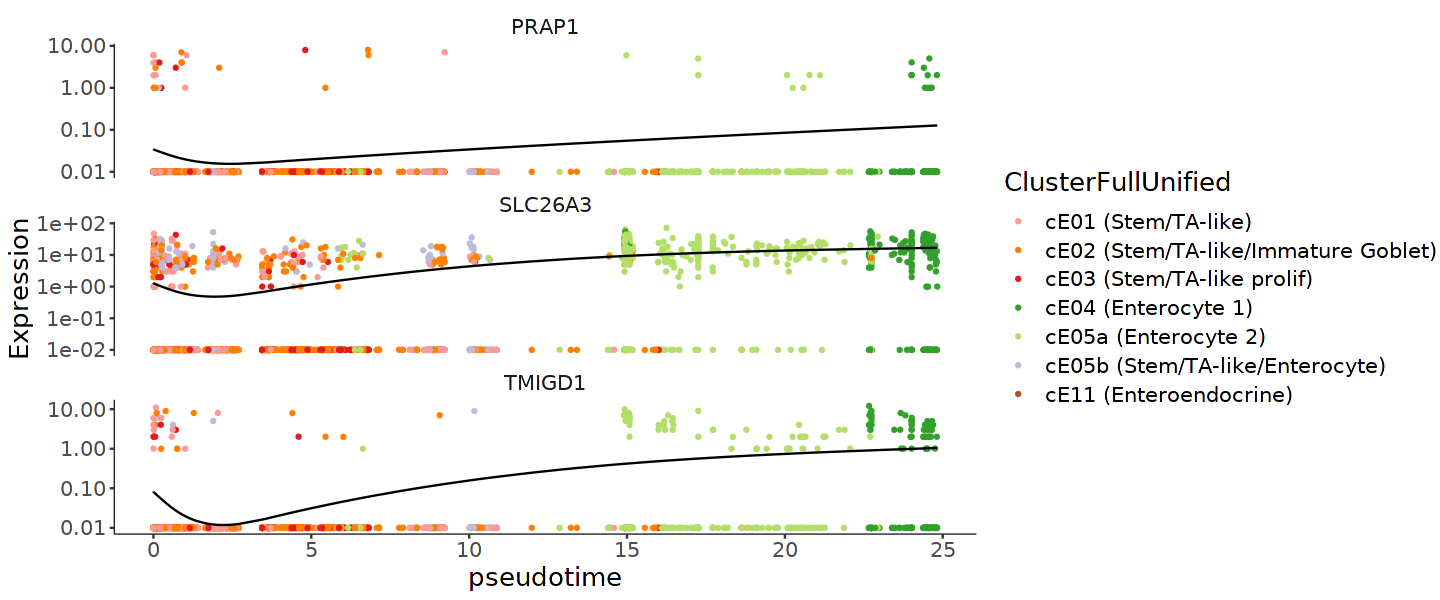

In [28]:
options(repr.plot.width=12,repr.plot.height=5)
genes <- c("SLC26A3","PRAP1","TMIGD1")
lineage_cds = cds_epi.sub.enterocyte_branch
condition1=colData(lineage_cds)$sample_source=='in-house'
condition2=colData(lineage_cds)$ClusterFullUnified %in% c('cE01 (Stem/TA-like)','cE02 (Stem/TA-like/Immature Goblet)','cE03 (Stem/TA-like prolif)','cE04 (Enterocyte 1)','cE05a (Enterocyte 2)','cE05b (Stem/TA-like/Enterocyte)','cE11 (Enteroendocrine)')
lineage_cds.sub <- lineage_cds[genes,condition1&condition2]
l=plot_genes_in_pseudotime(
    lineage_cds.sub,
     color_cells_by="ClusterFullUnified",
     min_expr=1e-2
)
p=(l + scale_color_manual(values=celltype_cmap) +  theme(text=element_text(size = 15)))
print(p)

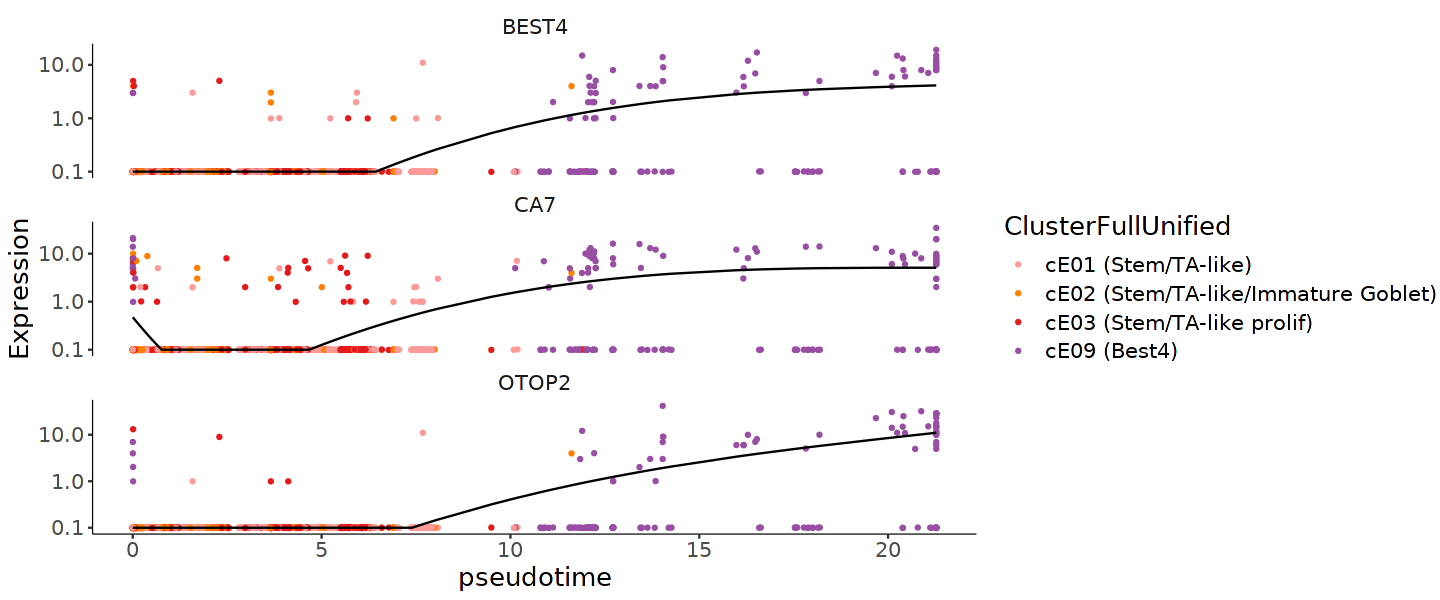

In [29]:
options(repr.plot.width=12,repr.plot.height=5)
genes <- c("OTOP2","BEST4","CA7")
lineage_cds = cds_epi.sub.best4_branch
condition1=colData(lineage_cds)$sample_source=='in-house'
condition2=colData(lineage_cds)$ClusterFullUnified %in% c('cE01 (Stem/TA-like)','cE02 (Stem/TA-like/Immature Goblet)','cE03 (Stem/TA-like prolif)','cE09 (Best4)')
lineage_cds.sub <- lineage_cds[genes,condition1&condition2]
l=plot_genes_in_pseudotime(
    lineage_cds.sub,
     color_cells_by="ClusterFullUnified",
     min_expr=1e-1
)
p=(l + scale_color_manual(values=celltype_cmap) + theme(text=element_text(size = 15)))
print(p)